Pour se connecter à ce notebook 
Besoin de lancer  l'image singularity de : _Containers/shortcakelight.sif

https://github.com/rnakato/ShortCake/tree/master
Est conçu spécifiquement pour les analyses de données single cell

Pour lancer l'image singularity et pouvoir se connecter aux notebooks jupyter:
srun --pty bash
singularity exec 6_Containers/shortcakelight.sif jupyternotebook.sh

puis faire le lien ssh sur l'ordi avec cette commande  que l'on ecrit dans le terminal local: 
ssh -A -t -t vgoupille@genossh.genouest.org -L 8888:localhost:8888 ssh cl1n030 -L 8888:localhost:8888
modifier le port (numero et noeud si besoin)

si probleme de connection 

ls -a
rm -r .vscode-server
puis se remet sur vscode 
et refait la liaison avec ssh remote (et reinstaller les extensions...)

Library strategy: microSPLiT
The data preprocessing and alignment was performed using a modified SPLiT-seq pipeline (https://github.com/Alex-Rosenberg/split-seq-pipeline). Modifications: using STAR with the splicing isoform detection swiwwe usededt the hioutghoutest-scored multimapping re. We also keptwening a ctional count based on the number igninggood alignments, since bacterial genomes are known to contain overlapping CDSs.
Genome_build: ASM904v1.45 and ASM80076v1.37 from EnsemblBacteria
Supplementary_files_format_and_content: Cell by gene matrix (with cells above threshold 200 UMI/cell); Gene names; Cell annotations (barcode and well for heat shock data, OD for B.subtilis growth curve). For B. Subtilis growth curve, only mRNA are included in the cell-by-gene matrix.
Supplementary_files_format_and_content: For the heat-shock data, barcodes in wells 1-24 belong to heat-shocked cells and in wells 25-48 belong to control cells.
 	

Ce texte décrit les stratégies et les méthodes utilisées pour traiter et aligner les données issues de l’expérience scRNA-seq réalisée avec la méthode microSPLiT.
	1.	Stratégie de séquençage (Library strategy) :
	•	La méthode utilisée est microSPLiT, qui est une adaptation de la technique SPLiT-seq, permettant de réaliser du scRNA-seq sans nécessiter d’isolation physique des cellules.
	2.	Prétraitement et alignement des données :
	•	L’alignement des séquences a été effectué avec une version modifiée du pipeline SPLiT-seq disponible sur GitHub (https://github.com/Alex-Rosenberg/split-seq-pipeline).
	•	Modifications apportées :
	•	Utilisation de STAR (un logiciel d’alignement des lectures RNA-seq) avec une détection des isoformes d’épissage.
	•	Sélection des meilleurs alignements multimapping selon un critère de score élevé.
	•	Conservation d’un compte fonctionnel basé sur le nombre d’alignements de bonne qualité, ce qui est pertinent pour les génomes bactériens où plusieurs CDSs (séquences codantes) peuvent se chevaucher.
	3.	Références génomiques utilisées :
	•	Les génomes de référence utilisés pour l’alignement sont :
	•	ASM904v1.45
	•	ASM80076v1.37
	•	Ces versions proviennent de la base de données EnsemblBacteria.
	4.	Fichiers supplémentaires et leur contenu :
	•	Les fichiers supplémentaires fournis incluent :
	•	Matrice cellule-gène (contenant uniquement les cellules ayant un minimum de 200 UMI/cellule).
	•	Noms des gènes.
	•	Annotations des cellules :
	•	Pour les données du stress thermique (heat-shock) : les cellules sont annotées par code-barres et puits.
	•	Pour la courbe de croissance de Bacillus subtilis : les cellules sont annotées selon leur densité optique (OD). Seuls les ARNm (mRNA) sont inclus dans la matrice cellule-gène.
	5.	Organisation des cellules dans l’expérience de stress thermique :
	•	Les cellules sont disposées dans 48 puits, avec une distinction entre conditions :
	•	Puits 1-24 : cellules soumises au stress thermique.
	•	Puits 25-48 : cellules témoins (non soumises au stress thermique).

replica 2 : M14 => B. subtilis PY79 (OD0.5-OD3.2)

replica 1 : M15 => B. subtilis PY79 (OD0.5-OD6.0)

other plate : M11 =>	B. subtilis PY79 + E. coli MW1255

# Telechargement des données preocessées  de l'article de Kuchina et al: 
Microbial single-cell RNA sequencing by split-pool barcoding
https://doi.org/10.1126/science.aba5257

protocole 2024: 
https://doi.org/10.1038/s41596-024-01007-w

les données de séquençage brute sont disponible sur SRA : 
The raw sequencing files are available at the Sequence Read Archive:
    - GSM4594094 : https://www.ncbi.nlm.nih.gov/sra/SRX8485151%5baccn%5d
    - GSM4594095 : https://www.ncbi.nlm.nih.gov/sra/SRX8485152%5baccn%5d
    - GSM4594096 : https://www.ncbi.nlm.nih.gov/sra/SRX8485153%5baccn%5d

Processed data were submitted to Gene Expression Omnibus, with accession number GSE151940.

#Les données processées sont disponibles sur le site de GEO:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE151940


SUPPLEMENTARY MATERIALS 
https://www.science.org/doi/10.1126/science.aba5257


NOUS N'ALLONS PAS UTILISER C'EST DONNEES QUI NE SONT PAS OBTENUE AVEC STARsolo 



Un autre article a analysé les données de scRNA-seq de la même expérience.
"Single-cell heterogeneity in ribosome content and the  consequences for the growth laws" par Brettner et al. (2024).

https://pmc.ncbi.nlm.nih.gov/articles/PMC11185559/

Récuperation des données et divers script sur la page :
    https://osf.io/kjfbz/
    
    - donnée Raw Data : obtenue avec STARsolo
    GEO060 => M14
    GEO061 => M15
    


# import the R script with other functions

source("7_Article/script/utile_bact/convert_gene_names.R")


source("7_Article/script/utile_bact/assign_cell_wells.R")


source("7_Article/script/utile_bact/randomhex_polyT_condense.R")



In [ ]:
# Chargement des librairies

library(reticulate)
library(dplyr)
library(cowplot)
library(Seurat) ##Note this code was written for a previous version of Seurat (4.1.1)
library(ggplot2)
library(Matrix)
library(forcats)
library(RColorBrewer)

# library(akmedoids) # on ne peut pas charger le pac-kages ici car il n'est pas installé sur le serveur et aussi n'est plus compatible avec la version de R






Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [2]:


# Ce code R définit une fonction nommée `assign_cell_wells` qui associe des codes-barres (barcodes) à des positions spécifiques dans une plaque de laboratoire (puits ou "wells").

# Voici ce que fait cette fonction :

# 1. Elle prend en entrée un vecteur de codes-barres (`barcodes`)
# 2. Elle initialise un dataframe vide `cell_wells` avec deux colonnes (barcode et well)
# 3. Pour chaque code-barre dans le vecteur d'entrée :
#    - Elle extrait la dernière partie du code-barre en le divisant par le caractère "_"
#    - Elle vérifie cette séquence (BC1) par rapport à une longue liste de séquences connues
#    - Selon la séquence identifiée, elle attribue le code-barre à un puits spécifique (A1, A2, B1, etc.)
#    - Si aucune correspondance n'est trouvée, elle attribue "unknown" au puits
#    - Elle affiche le numéro d'itération (i) pour suivre la progression
# 4. À la fin, elle renvoie le dataframe complet avec les associations code-barre/puits

# Cette fonction est typiquement utilisée dans des analyses de séquençage à haut débit où les échantillons sont identifiés par des codes-barres et disposés dans une plaque de 96 puits (format 8×12, d'où les désignations A1-H12).




assign_cell_wells <- function(barcodes){

  cell_wells <- data.frame(barcode <- c(), well <- c())
  
  for (i in 1:length(barcodes)){
    
    BC1 <- last(unlist(strsplit(barcodes[i], "_")))
    
    if (BC1 == 'ACTCGTAA' | BC1 == 'CTGCTTTG'){
      temp <- data.frame(barcode = barcodes[i], well = "A1")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AAACGATA' | BC1 == 'CATGATCA'){
      temp <- data.frame(barcode = barcodes[i], well = "A2")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTACCTCG' | BC1 == 'GGGTAGCG'){
      temp <- data.frame(barcode = barcodes[i], well = "A3")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GCCTGCAA' | BC1 == 'CCGAGAAA'){
      temp <- data.frame(barcode = barcodes[i], well = "A4")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TGGTATAC' | BC1 == 'ACGGACTC'){
      temp <- data.frame(barcode = barcodes[i], well = "A5")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGTTCGAG' | BC1 == 'ACTTACGA'){
      temp <- data.frame(barcode = barcodes[i], well = "A6")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TCTATTAC' | BC1 == 'TATTTAAG'){
      temp <- data.frame(barcode = barcodes[i], well = "A7")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ATAAGCTC' | BC1 == 'ACCGTACG'){
      temp <- data.frame(barcode = barcodes[i], well = "A8")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ATTCATGG' | BC1 == 'TATAGTCG'){
      temp <- data.frame(barcode = barcodes[i], well = "A9")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ATCCGCGA' | BC1 == 'TGGGCATC'){
      temp <- data.frame(barcode = barcodes[i], well = "A10")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ATCGCATA' | BC1 == 'TACCTAGA'){
      temp <- data.frame(barcode = barcodes[i], well = "A11")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CCGTTCTA' | BC1 == 'GCTGCATG'){
      temp <- data.frame(barcode = barcodes[i], well = "A12")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TGGCGCGC' | BC1 == 'GTCATATG'){
      temp <- data.frame(barcode = barcodes[i], well = "B1")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TGTCTGAA' | BC1 == 'ATATTGGC'){
      temp <- data.frame(barcode = barcodes[i], well = "B2")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CTGTCCCG' | BC1 == 'CTAAGGGA'){
      temp <- data.frame(barcode = barcodes[i], well = "B3")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AATTTCTC' | BC1 == 'TCGTTTCG'){
      temp <- data.frame(barcode = barcodes[i], well = "B4")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGCGACTA' | BC1 == 'GAATAATG'){
      temp <- data.frame(barcode = barcodes[i], well = "B5")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GGGATCGG' | BC1 == 'ACTGCGCA'){
      temp <- data.frame(barcode = barcodes[i], well = "B6")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTATTCTG' | BC1 == 'GCTTATAG'){
      temp <- data.frame(barcode = barcodes[i], well = "B7")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AGGCGGCA' | BC1 == 'ATCATGCA'){
      temp <- data.frame(barcode = barcodes[i], well = "B8")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ACGCCGGC' | BC1 == 'ACGTTAAC'){
      temp <- data.frame(barcode = barcodes[i], well = "B9")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTGTCTTA' | BC1 == 'CCATCTTG'){
      temp <- data.frame(barcode = barcodes[i], well = "B10")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TACGGTTA' | BC1 == 'CATAGCTA'){
      temp <- data.frame(barcode = barcodes[i], well = "B11")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTGGGAGA' | BC1 == 'GAGGTTGA'){
      temp <- data.frame(barcode = barcodes[i], well = "B12")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TGCTTGGG' | BC1 == 'GCACTGAC'){
      temp <- data.frame(barcode = barcodes[i], well = "C1")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TAAATATC' | BC1 == 'TTCATCGC'){
      temp <- data.frame(barcode = barcodes[i], well = "C2")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CACAATTG' | BC1 == 'GAAATTAG'){
      temp <- data.frame(barcode = barcodes[i], well = "C3")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GTGCTAGC' | BC1 == 'AGGATTAA'){
      temp <- data.frame(barcode = barcodes[i], well = "C4")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGCCCGGA' | BC1 == 'AATAGAAC'){
      temp <- data.frame(barcode = barcodes[i], well = "C5")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GCTCGCGG' | BC1 == 'TCTTAATC'){
      temp <- data.frame(barcode = barcodes[i], well = "C6")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CTTTGGTC' | BC1 == 'TAATACGC'){
      temp <- data.frame(barcode = barcodes[i], well = "C7")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTCCGATC' | BC1 == 'GTTTGTGA'){
      temp <- data.frame(barcode = barcodes[i], well = "C8")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTCGCTAC' | BC1 == 'CGAACGTC'){
      temp <- data.frame(barcode = barcodes[i], well = "C9")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AGCGAAAC' | BC1 == 'GGTTCTTC'){
      temp <- data.frame(barcode = barcodes[i], well = "C10")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AAATAGCA' | BC1 == 'GCAAATTC'){
      temp <- data.frame(barcode = barcodes[i], well = "C11")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGTCTAGG' | BC1 == 'GCTATGCG'){
      temp <- data.frame(barcode = barcodes[i], well = "C12")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GCCGTGTA' | BC1 == 'CTACCCTA'){
      temp <- data.frame(barcode = barcodes[i], well = "D1")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGCTTAAA' | BC1 == 'GTGGGTTC'){
      temp <- data.frame(barcode = barcodes[i], well = "D2")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GACCTTTC' | BC1 == 'GTCCGTAG'){
      temp <- data.frame(barcode = barcodes[i], well = "D3")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GGTGGAGC' | BC1 == 'TGCGATCG'){
      temp <- data.frame(barcode = barcodes[i], well = "D4")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TACTCGAA' | BC1 == 'TATCCGGG'){
      temp <- data.frame(barcode = barcodes[i], well = "D5")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CATTTGGA' | BC1 == 'AGGTAATA'){
      temp <- data.frame(barcode = barcodes[i], well = "D6")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GACGGGAC' | BC1 == 'CGTGGTTG'){
      temp <- data.frame(barcode = barcodes[i], well = "D7")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GTCGCGCG' | BC1 == 'GACAAAGC'){
      temp <- data.frame(barcode = barcodes[i], well = "D8")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GTTACGTA' | BC1 == 'GGGCGATG'){
      temp <- data.frame(barcode = barcodes[i], well = "D9")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CTATTTCA' | BC1 == 'ATCTATAA'){
      temp <- data.frame(barcode = barcodes[i], well = "D10")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ACTATATA' | BC1 == 'GCCCATGA'){
      temp <- data.frame(barcode = barcodes[i], well = "D11")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TCACTTTA' | BC1 == 'CTGAAAGG'){
      temp <- data.frame(barcode = barcodes[i], well = "D12")
      cell_wells <- rbind(cell_wells, temp)
    } else {
      temp <- data.frame(barcode = barcodes[i], well = "unknown")
      cell_wells <- rbind(cell_wells, temp) 
    }
    print(i)
  }

  return(cell_wells)
}

In [3]:

# Ce code convertit les noms de gènes bactériens en utilisant une table de conversion stockée dans un fichier CSV. 

convert_gene_names_bacteria <- function(genes){
  
  conversion_table <- read.csv('7_Article/script/utile_bact/bacteria_gene_conversion.csv')
  new.features <- c()
  
  for (i in 1:length(genes)){
    
    if (genes[i] %in% conversion_table$genecode){
    
        genename <- conversion_table$genename[which(conversion_table$genecode == genes[i])]
        
    } else {
      
        genename <- genes[i]
        
    }
    
    new.features <- c(new.features, genename)
  }
  
  return(new.features)
  
}

In [4]:
round_one_bc_collapse <- function(data, threshold){
  
  r6pt <- read.csv('7_Article/script/utile_bact/r6ptorderedbcs.csv')
  r6pt <- r6pt$x
  
  temp <- data[,r6pt]
 
  temp <- temp[,which(c(1:length(r6pt))%%2==1)] + temp[,which(c(1:length(r6pt))%%2==0)]
 
 colnames(temp) <- r6pt[which(c(1:length(r6pt))%%2==1)]
 rownames(temp) <- rownames(data)
 
 temp <- temp[,which(colSums(temp) > 0)]
 
 y = as.numeric(log(colSums(temp)[order(colSums(temp), decreasing = TRUE)]))
 x = log(c(1:length(y)))
 plot(x,y)

 slope = as.numeric((y[length(y)]-y[1])/(x[length(x)]-x[1]))
 yline = slope*x + y[1]
 lines(x,yline, col = 2)

 d = sqrt((y-yline)^2)
 plot(x,d)
 d2 = d[which(d >= d[which.max(d)]*threshold)]
 x2 = x[which(d >= d[which.max(d)]*threshold)]
 points(x2,d2, col = 3)
 
 temp <- temp[,which(colSums(temp) >= exp(y[which(x == x2[which.max(x2)])]))]
 #dim(temp)
 
 return(temp)
}

In [ ]:


#--bacteria data processing-----------------------------------------------------------------------------

#function to create Seurat Object for downstream analysis from counts, features, barcodes, and other metadata
create_seurat_object_from_seq_files <- function(data_dir, sublibrary, ribosome_removal, threshold){
  
  setwd(list.dirs(data_dir))
  
  data <- readMM('UniqueAndMult-Uniform.mtx')
  genes <- read.table('features.tsv')
  genes <- genes$V1
  genes <- convert_gene_names_bacteria(genes)
  barcodes <- read.table('barcodes.tsv')
  barcodes <- barcodes$V1 # est le nom automatique de la première colonne
  
  rownames(data) <- genes
  colnames(data) <- barcodes
  
  #use filtered cells

  filteredData <- round_one_bc_collapse(data, threshold)
  
  #deal with ribosomal reads
  
  if (ribosome_removal == 'rRNA') {
    ribosomes <- read.csv('7_Article/script/utile_bact/bacteria.ribosomes.csv')
    colnames(ribosomes) <- c('gene','type')
    rRNA <- ribosomes[which(ribosomes$type == 'rRNA'),]
    mRNA <- filteredData[which(!(rownames(filteredData) %in% rRNA$gene)),]
    
    #convert to Seurat object
    SO <- CreateSeuratObject(counts = mRNA)
  } else {
    #convert to Seurat object
    SO <- CreateSeuratObject(counts = filteredData, min.cells = 15, min.features = 5)
  }
  
  #add metadata
  wells <- assign_cell_wells(colnames(SO@assays$RNA))
  celldata <- wells$well
  celldata <- as.data.frame(celldata)
  row.names(celldata) <- wells$barcode
  
  SO$well <- celldata$celldata
  SO$sublibrary <- sublibrary
  
  return(SO)
}

# 1. Fonction create_seurat_object_from_seq_files()

# Cette fonction prend en entrée :
# 	•	data_dir : Répertoire contenant les fichiers de données de séquençage.
# 	•	sublibrary : Nom d’une sous-bibliothèque (sublibrary), utilisé pour l’annotation des cellules.
# 	•	ribosome_removal : Option pour filtrer les ARN ribosomiques ('none' = ne pas filtrer, 'rRNA' = enlever les gènes ribosomiques).
# 	•	threshold : Seuil utilisé dans round_one_bc_collapse() pour filtrer les cellules (probablement en fonction du nombre de lectures).

In [ ]:

### Création des objets Seurat pour les données de séquençage de B. subtilis

#GEO661 <- create_seurat_object_from_seq_files('C:/Users/lbrettne/Desktop/GEO661 Solo.out/bacillus_only/GeneFull/raw/','M15','none',0.85) # avec ribosome 


#B. subtilis replicate 1 
GEO661 <- create_seurat_object_from_seq_files('7_Article/data/data_osf/GEO061','M15','none',0.85) # avec ribosome 
GEO661.nr <- create_seurat_object_from_seq_files('7_Article/data/data_osf/GEO061','M15','rRNA',0.85) # sans ribosome

#B. subtilis replicate 2
GEO660 <- create_seurat_object_from_seq_files('7_Article/data/data_osf/GEO660','M14','none',0.875)
GEO660.nr <- create_seurat_object_from_seq_files('7_Article/data/data_osf/GEO660','M14','rRNA',0.875)


In [ ]:
AUTRe


# info sur les objets de type Anndata
https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html

# info sur l'utilisation de Scanpy 
https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

In [ ]:
import pandas as pd
import scanpy as sc
import numpy as np
from scipy.sparse import csr_matrix

# Charger les fichiers CSV
barcodes = pd.read_csv("7_Article/data/GSE_extracted/GSM4594094_M11_barcodes.csv", header=None)[0]  # Liste des cellules
genes = pd.read_csv("7_Article/data/GSE_extracted/GSM4594094_M11_genes.csv", header=None)[0]  # Liste des gènes
dcm = pd.read_csv("7_Article/data/GSE_extracted/GSM4594094_M11_dcm.csv", header=None)  # Matrice d'expression (comptages)

# Vérifier les dimensions
print(f"Barcodes: {len(barcodes)}, Genes: {len(genes)}, DCM shape: {dcm.shape}")

Barcodes: 2682, Genes: 7568, DCM shape: (2682, 7568)


In [ ]:
# Conversion en matrice sparse pour économiser de la mémoire
X = csr_matrix(dcm.values)  # Convertir en format sparse si les données sont volumineuses

# Création de l'objet AnnData
adata = sc.AnnData(X=X)

# Ajouter les noms des cellules et des gènes
adata.obs_names = barcodes  # Identifiants des cellules
adata.var_names = genes  # Identifiants des gènes

# Vérifier l'objet créé
print(adata)

AnnData object with n_obs × n_vars = 2682 × 7568


In [ ]:
adata

AnnData object with n_obs × n_vars = 2682 × 7568

In [ ]:
import os
#print(os.getcwd())  # Affiche le répertoire de travail actuel
os.makedirs("7_Article/results", exist_ok=True)  # Crée le dossier s'il n'existe pas
adata.write("7_Article/results/data.h5ad")  # Sauvegarde dans le dossier "results"
print(os.path.exists("7_Article/results/data.h5ad"))  # True si le fichier est bien enregistré

True


In [ ]:
# Charger les données
adata = sc.read("7_Article/results/data.h5ad")
# Afficher les dimensions
print(adata)  # Affiche les dimensions de la matrice d'expression

AnnData object with n_obs × n_vars = 2682 × 7568


In [ ]:
# Afficher les 5 premières cellules et les 5 premiers gènes
print(adata[:5, :5].to_df())


                                               BSU_rRNA_29_BSUBT  \
AAACATCGAACAACCA_41_20200401_M11_0510_K12_168           0.100000   
AAACATCGAACTCACC_12_20200330_M11_0414                  95.029745   
AAACATCGAAGACGGA_1_20200401_M11_0510_K12_168            0.411111   
AAACATCGAAGAGATC_35_20200330_M11_0414                   0.000000   
AAACATCGAAGGTACA_6_20200401_M11_0510_K12_168            0.225000   

                                               BSU_rRNA_5_BSUBT  \
AAACATCGAACAACCA_41_20200401_M11_0510_K12_168           0.10000   
AAACATCGAACTCACC_12_20200330_M11_0414                 107.04071   
AAACATCGAAGACGGA_1_20200401_M11_0510_K12_168            0.30000   
AAACATCGAAGAGATC_35_20200330_M11_0414                   0.00000   
AAACATCGAAGGTACA_6_20200401_M11_0510_K12_168            0.22500   

                                               BSU_rRNA_2_BSUBT  \
AAACATCGAACAACCA_41_20200401_M11_0510_K12_168          0.100000   
AAACATCGAACTCACC_12_20200330_M11_0414                1

Qualité et filtrage 

In [ ]:
# Nombre total de gènes et d'UMI par cellule
adata.var["mt"] = adata.var_names.str.startswith("MT-")  # Marquer les gènes mitochondriaux

#voir ceux qui sont des gènes mitochondriaux et ceux qui ne le sont pas : faaire le compte
adata.var["mt"]

# voir ceux true et ceux false
adata.var["mt"].value_counts()



mt
False    7568
Name: count, dtype: int64

In [ ]:
adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)  # Nombre de gènes détectés par cellule
print(adata.obs["n_genes"])


AAACATCGAACAACCA_41_20200401_M11_0510_K12_168     59
AAACATCGAACTCACC_12_20200330_M11_0414            141
AAACATCGAAGACGGA_1_20200401_M11_0510_K12_168     129
AAACATCGAAGAGATC_35_20200330_M11_0414             48
AAACATCGAAGGTACA_6_20200401_M11_0510_K12_168     105
                                                ... 
TTCACGCAGTCTGTCA_46_20200401_M11_0510_K12_168    192
TTCACGCATAGGATGA_7_20200401_M11_0510_K12_168     256
TTCACGCATGAAGAGA_12_20200401_M11_0510_K12_168     33
TTCACGCATGAAGAGA_35_20200401_M11_0510_K12_168    344
TTCACGCATTCACGCA_21_20200330_M11_0414            545
Name: n_genes, Length: 2682, dtype: int64


In [ ]:
adata.obs["n_counts"] = adata.X.sum(axis=1)  # Nombre total d'UMI par cellule
print(adata.obs["n_counts"])

AAACATCGAACAACCA_41_20200401_M11_0510_K12_168      787.0
AAACATCGAACTCACC_12_20200330_M11_0414             1647.0
AAACATCGAAGACGGA_1_20200401_M11_0510_K12_168      2930.0
AAACATCGAAGAGATC_35_20200330_M11_0414              942.0
AAACATCGAAGGTACA_6_20200401_M11_0510_K12_168      1521.0
                                                  ...   
TTCACGCAGTCTGTCA_46_20200401_M11_0510_K12_168     4290.0
TTCACGCATAGGATGA_7_20200401_M11_0510_K12_168      2309.0
TTCACGCATGAAGAGA_12_20200401_M11_0510_K12_168      233.0
TTCACGCATGAAGAGA_35_20200401_M11_0510_K12_168    13202.0
TTCACGCATTCACGCA_21_20200330_M11_0414            10959.0
Name: n_counts, Length: 2682, dtype: float64


/opt/micromamba/envs/shortcake_default/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


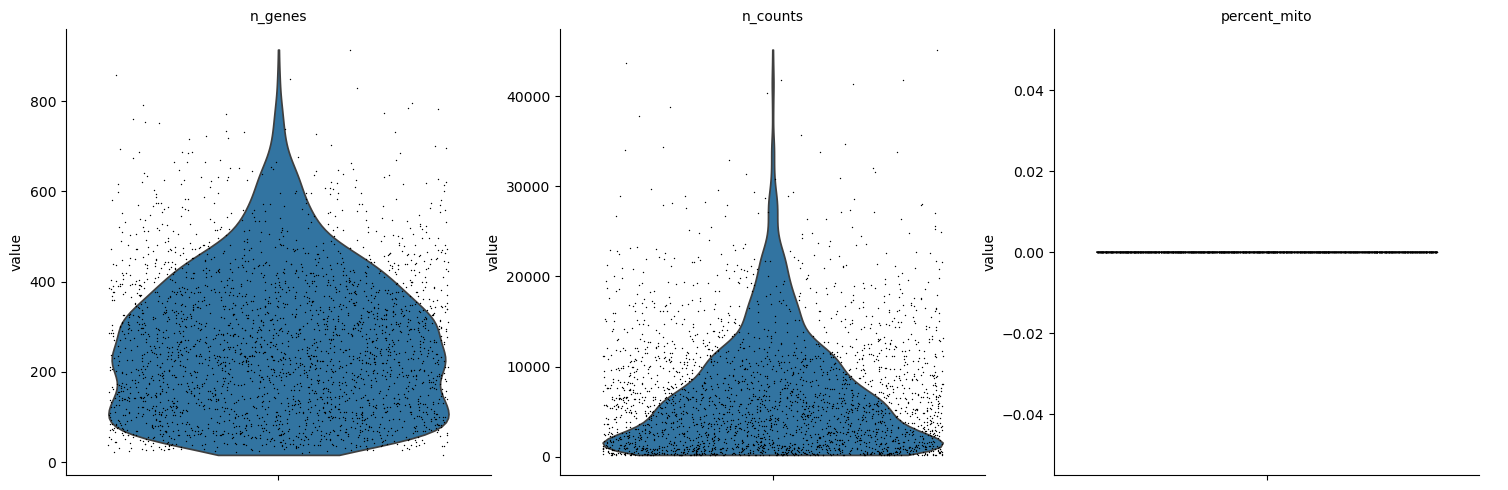

In [ ]:
adata.obs["percent_mito"] = (np.array(adata[:, adata.var["mt"].values].X.sum(axis=1)).flatten() / adata.obs["n_counts"]) * 100

sc.pl.violin(adata, ["n_genes", "n_counts", "percent_mito"], jitter=0.4, multi_panel=True)

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)  # Garde cellules avec au moins 200 gènes
sc.pp.filter_genes(adata, min_cells=3)  # Garde gènes exprimés dans au moins 3 cellules

Normalisation et Transformation

In [ ]:
#Normaliser les valeurs d’expression (ex: TPM-like transformation)
sc.pp.normalize_total(adata, target_sum=1e4)  # Normalisation par le total d'UMIs par cellule
sc.pp.log1p(adata)  # Transformation log

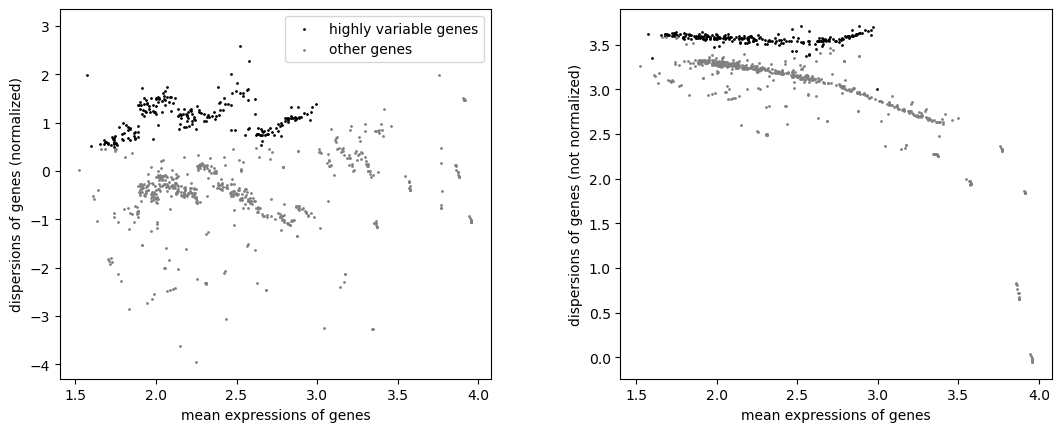

In [ ]:
#Identifier les gènes les plus variables :
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

 Réduction de Dimensionnalité

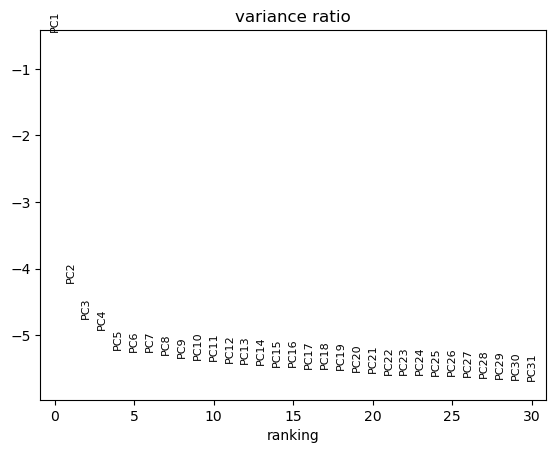

In [ ]:
# PCA pour réduire la dimensionnalité
sc.pp.pca(adata, n_comps=50)
sc.pl.pca_variance_ratio(adata, log=True)

/opt/micromamba/envs/shortcake_default/lib/python3.10/site-packages/scipy/sparse/_index.py:197: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


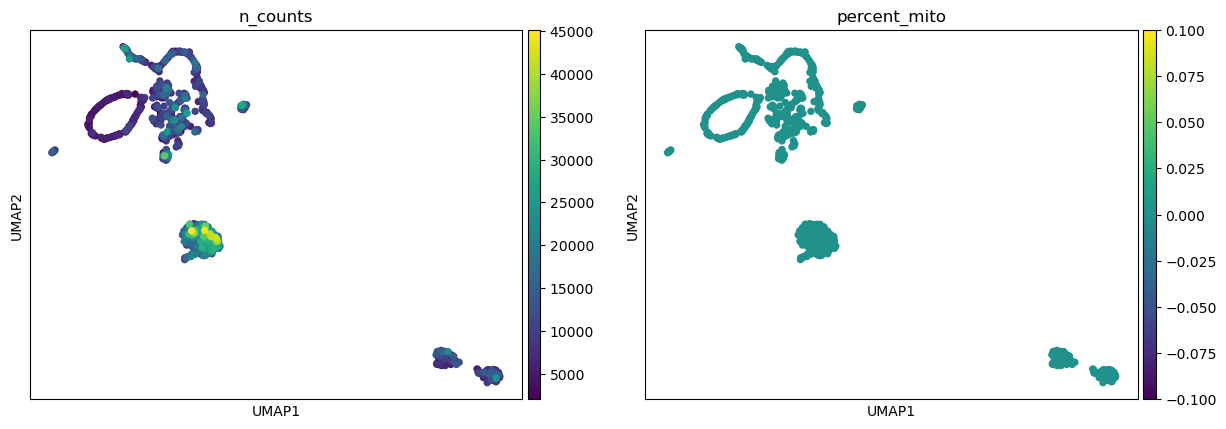

In [ ]:
#UMAP ou t-SNE pour visualisation :
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["n_counts", "percent_mito"]) 
# Coloration par expression  
# ncount correspond au nombre d'UMI par cellule
# il n'y a pas de gene mitochonrial donc pas de coloration

Clustering des Cellules

/tmp/ipykernel_35417/2307846119.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)  # Modifier la résolution si besoin


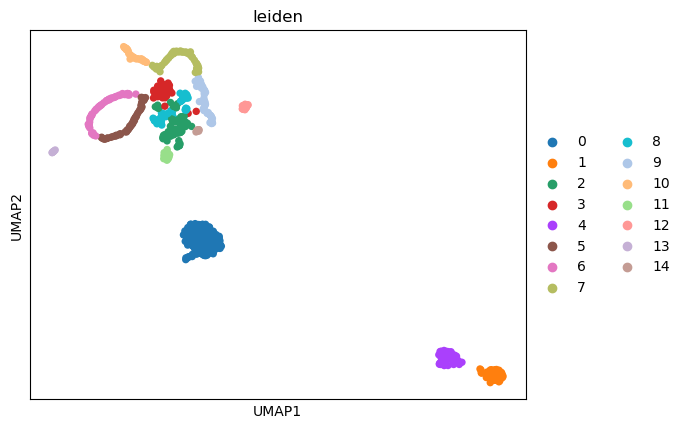

In [ ]:
# calcul du clustering (Louvain ou Leiden)
sc.tl.leiden(adata, resolution=0.5)  # Modifier la résolution si besoin
sc.pl.umap(adata, color=["leiden"])  # Visualisation du clustering

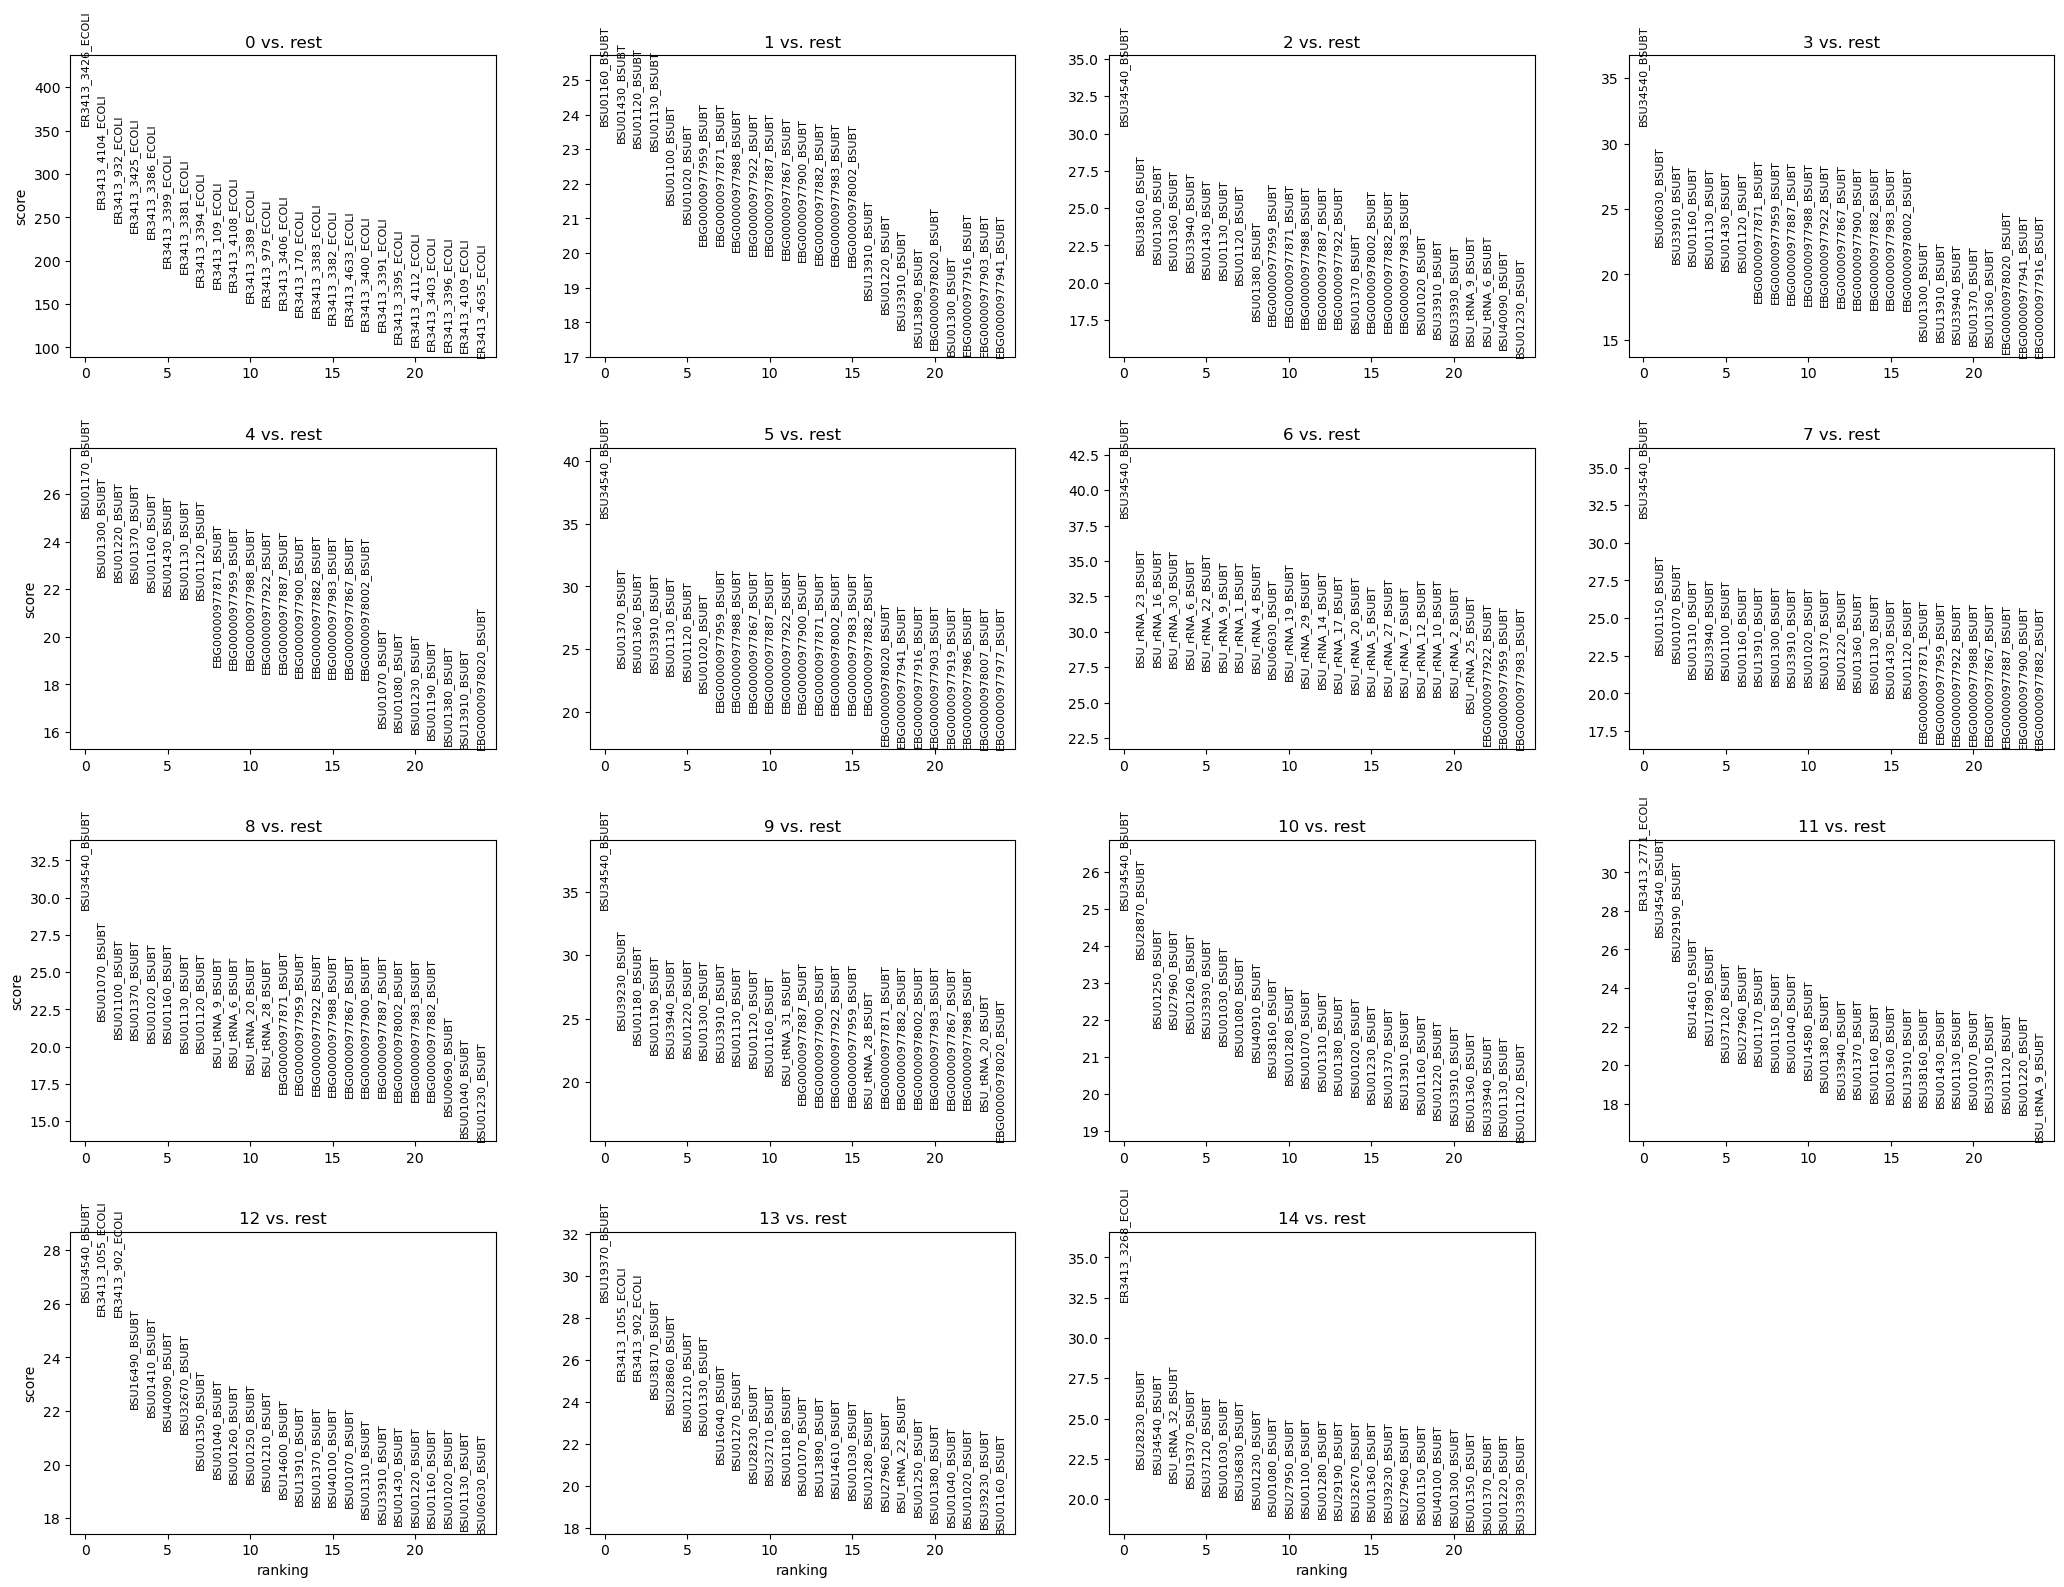

In [ ]:
#Identifier les marqueurs de chaque cluster :
sc.tl.rank_genes_groups(adata, "leiden", method="t-test")  # Test statistique
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)  # Visualisation

In [ ]:
adata.write("7_Article/results/processed_data.h5ad")  # Sauvegarde l'objet AnnData

adata.obs.to_csv("7_Article/results/metadata.csv")  # Sauvegarde les métadonnées
adata.to_df().to_csv("7_Article/results/expression_matrix.csv")  # Sauvegarde la matrice d'expression